Anggota Kelompok 12:
1. 21083010045 | Muhamad Haris Hartanto
2. 21083010048 | Amanda Aulia
3. 21083010057 | Alyssa Amorita Azzah

In [3]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Data Loading

In [4]:
data_df = pd.read_csv('data/hepatitis.csv')
data_df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Data Prepocessing

## Data Cleaning

In [5]:
# mengubah nama feature menjadi huruf kecil dan mengubah spasi menjadi underscore
data_df.columns = data_df.columns.str.replace(' ', '_').str.lower()
data_df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [6]:
# mengubah "?" menjadi NaN
data_df = data_df.replace('?', np.NaN)

In [7]:
data_df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [8]:
# menghitung jumlah missing value
data_df.isnull().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [9]:
# memeriksa tipe data
data_df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [10]:
# menyesuaikan tipe data

# inisialisasi tipe data feature
int_features = ['age']
float_features = ['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# mengubah tipe data menjadi numerik untk feature age, bilirubin, alk_phosphate, sgot, albumin, and protime
data_df = data_df.astype({col: 'int64' for col in int_features})
data_df = data_df.astype({col: 'float64' for col in float_features})

# mengubah tipe data menjadi object untuk feature lainnya
data_df = data_df.astype({col: 'object' for col in data_df.columns if col not in int_features + float_features})

In [11]:
# memeriksa tipe data setelah perubahan
data_df.dtypes

class               object
age                  int64
sex                 object
steroid             object
antivirals          object
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology           object
dtype: object

## Imputasi

In [12]:
# memisahkan data berdasarkan class
class_1_df = data_df[data_df['class'] == 1]
class_2_df = data_df[data_df['class'] == 2]

### Imputasi Class 1

In [13]:
# menghitung jumlah missing value pada class 1
class_1_df.isnull().sum()

class               0
age                 0
sex                 0
steroid             0
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           5
liver_firm          5
spleen_palpable     1
spiders             1
ascites             1
varices             1
bilirubin           2
alk_phosphate       8
sgot                2
albumin             5
protime            14
histology           0
dtype: int64

In [14]:
# imputasi missing value dengan mean yang dibulatkan 3 angka di belakang koma untuk kolom numerik pada class_1_df
numeric_features = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
class_1_df[numeric_features] = class_1_df[numeric_features].fillna(class_1_df[numeric_features].mean())

# imputasi missing value dengan mode untuk kolom kategorik pada class_1_df
categorical_columns = [col for col in class_1_df.columns if col not in numeric_features]
class_1_df[categorical_columns] = class_1_df[categorical_columns].fillna(class_1_df[categorical_columns].mode().iloc[0])

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_9716\1110576656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1_df[numeric_features] = class_1_df[numeric_features].fillna(class_1_df[numeric_features].mean())
C:\Users\zoxrl\AppData\Local\Temp\ipykernel_9716\1110576656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1_df[categorical_columns] = class_1_df[categorical_columns].fillna(class_1_df[categorical_columns].mode().iloc[0])


In [15]:
# menghitung jumlah missing value pada class 1 setelah imputasi
class_1_df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

### Imputasi Class 2

In [16]:
# menghitung jumlah missing value pada class 2
class_2_df.isnull().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big           5
liver_firm          6
spleen_palpable     4
spiders             4
ascites             4
varices             4
bilirubin           4
alk_phosphate      21
sgot                2
albumin            11
protime            53
histology           0
dtype: int64

In [17]:
# imptasi missing value dengan mean untuk kolom numerik pada class_2_df
class_2_df[numeric_features] = class_2_df[numeric_features].fillna(class_2_df[numeric_features].mean())

# imputasi missing value dengan mode untuk kolom kategorik pada class_2_df
categorical_columns = [col for col in class_2_df.columns if col not in numeric_features]
class_2_df[categorical_columns] = class_2_df[categorical_columns].fillna(class_2_df[categorical_columns].mode().iloc[0])

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_9716\3813093393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2_df[numeric_features] = class_2_df[numeric_features].fillna(class_2_df[numeric_features].mean())
C:\Users\zoxrl\AppData\Local\Temp\ipykernel_9716\3813093393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2_df[categorical_columns] = class_2_df[categorical_columns].fillna(class_2_df[categorical_columns].mode().iloc[0])


In [18]:
# menghitung jumlah missing value pada class 2 setelah imputasi
class_2_df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

### Menggabungkan Class 1 dan Class 2

In [19]:
data_df_2 = pd.concat([class_1_df, class_2_df], axis=0)

# mengurutkan data berdasarkan index
data_df_2 = data_df_2.sort_index()
data_df_2

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,66.571429,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,66.571429,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,66.571429,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,101.313725,200.0,4.0,66.571429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,122.375000,242.0,3.3,50.000000,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,66.571429,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,66.571429,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


## Data Transformation (Standardization)

In [20]:
# mengubah semua tipe data menjadi numerik (diperlukan untuk proses standardisasi)
data_df_2 = data_df_2.astype({col: 'int64' for col in data_df_2.columns if col not in numeric_features})
data_df_2.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology            int64
dtype: object

In [21]:
# membuat predifined function untuk standardisasi data
def rataan(data):
    jumlah = 0
    n = 0
    for i in data:
        jumlah+=i
        n += 1
    hasil_rataan = jumlah/n
    return hasil_rataan

def std_dev(data):
    jumlah = 0
    n = 0
    for i in data:
        jumlah += (i - rataan(data))**2
        n += 1
    hasil_varians = jumlah/(n-1)
    hasil_stdev = hasil_varians**(0.5)
    return hasil_stdev

def z_score_standardization(data):
    return (data - rataan(data)) / std_dev(data)

In [22]:
# menyalin data
std_data_df = data_df_2.copy()

# normalisasi semua feature kecuali class
for col in std_data_df.columns:
    if col != 'class':
        std_data_df[col] = z_score_standardization(std_data_df[col])

# menampilkan data hasil standardisasi
std_data_df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,-0.891303,2.937933,-1.016252,0.426643,1.363196,0.802963,0.508413,-2.272983,0.792152,0.488315,0.708235,0.383657,0.361302,-0.363447,-0.443479,-0.768745,0.306213,0.260667,-0.904553
1,2,0.700309,-0.338179,-1.016252,0.426643,-0.728837,0.802963,0.508413,-2.272983,0.792152,0.488315,0.708235,0.383657,0.361302,-0.447065,0.629704,-0.497540,-0.487847,0.260667,-0.904553
2,2,2.928566,-0.338179,0.977660,0.426643,-0.728837,0.802963,0.508413,0.437112,0.792152,0.488315,0.708235,0.383657,0.361302,-0.614299,-0.207379,-0.610542,0.306213,0.260667,-0.904553
3,2,-0.811722,-0.338179,0.977660,-2.328759,1.363196,0.802963,0.508413,0.437112,0.792152,0.488315,0.708235,0.383657,0.361302,-0.614299,-1.280563,-0.384538,0.306213,0.995557,-0.904553
4,2,-0.572980,-0.338179,0.977660,0.426643,1.363196,0.802963,0.508413,0.437112,0.792152,0.488315,0.708235,0.383657,0.361302,-0.363447,-0.093327,1.287892,0.306213,0.260667,-0.904553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,0.381987,-0.338179,0.977660,0.426643,-0.728837,-1.237353,-1.954214,0.437112,0.792152,0.488315,-1.402851,-2.589682,-2.749910,5.155300,0.358725,1.762501,-0.805470,-0.646219,1.098386
151,2,0.222826,-0.338179,0.977660,0.426643,-0.728837,0.802963,0.508413,0.437112,-1.254240,0.488315,0.708235,0.383657,0.361302,-0.447065,0.436531,0.632480,0.782648,0.260667,1.098386
152,2,1.575696,-0.338179,-1.016252,0.426643,-0.728837,-1.237353,0.508413,-2.272983,-1.254240,0.488315,-1.402851,0.383657,0.361302,-0.530682,-0.658116,-0.746145,0.465024,0.260667,1.098386
153,2,0.939051,2.937933,-1.016252,0.426643,-0.728837,0.802963,0.508413,0.437112,0.792152,-2.034646,-1.402851,0.383657,-2.749910,0.054640,-0.529334,-0.757445,0.465024,-0.755671,1.098386


# Exploratory Data Analysis

In [23]:
# menyesuaikan tipe data

# inisialisasi tipe data feature
int_features = ['age']
float_features = ['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# mengubah tipe data menjadi numerik untk feature age, bilirubin, alk_phosphate, sgot, albumin, and protime
data_df_2 = data_df_2.astype({col: 'int64' for col in int_features})
data_df_2 = data_df_2.astype({col: 'float64' for col in float_features})

# mengubah tipe data menjadi object untuk feature lainnya
data_df_2 = data_df_2.astype({col: 'object' for col in data_df.columns if col not in int_features + float_features})

## Statistik Deskriptif

In [24]:
# menampilkan statistik deskriptif
data_df_2.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.434655,105.661860,86.029308,3.807185,61.808295
std,12.565878,1.195924,46.590339,88.493964,0.629676,18.272894
min,7.000000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.000000,0.800000,78.000000,32.500000,3.400000,46.500000
50%,39.000000,1.000000,101.313725,59.000000,3.977679,66.571429
75%,50.000000,1.500000,122.375000,99.916667,4.200000,66.571429
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


In [25]:
data_df_2.describe(include='object')

,class,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
count,155,155,155,155,155,155,155,155,155,155,155,155,155,155
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,2,1,2,2,1,2,2,2,2,2,2,2,2,1
freq,123,139,79,131,101,94,123,130,95,125,103,135,137,85


## Visualisasi Data

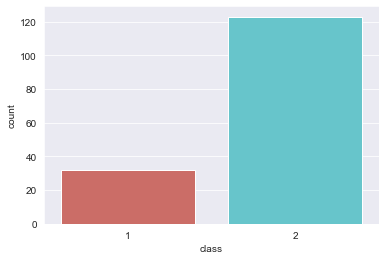

In [26]:
# Count Plot untuk atribut class
sns.countplot(x='class', data=data_df_2, palette='hls')
plt.xlabel('class')
plt.show()

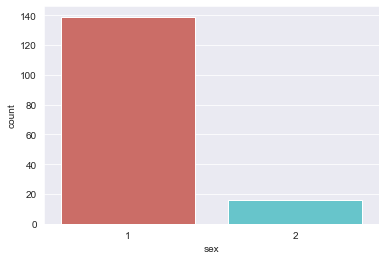

In [27]:
# Count Plot untuk atribut sex
sns.countplot(x='sex', data=data_df_2, palette='hls')
plt.xlabel('sex')
plt.show()

In [28]:
data_df_2 = data_df_2.astype({col: 'int64' for col in data_df_2.columns if col not in numeric_features})

<AxesSubplot: >

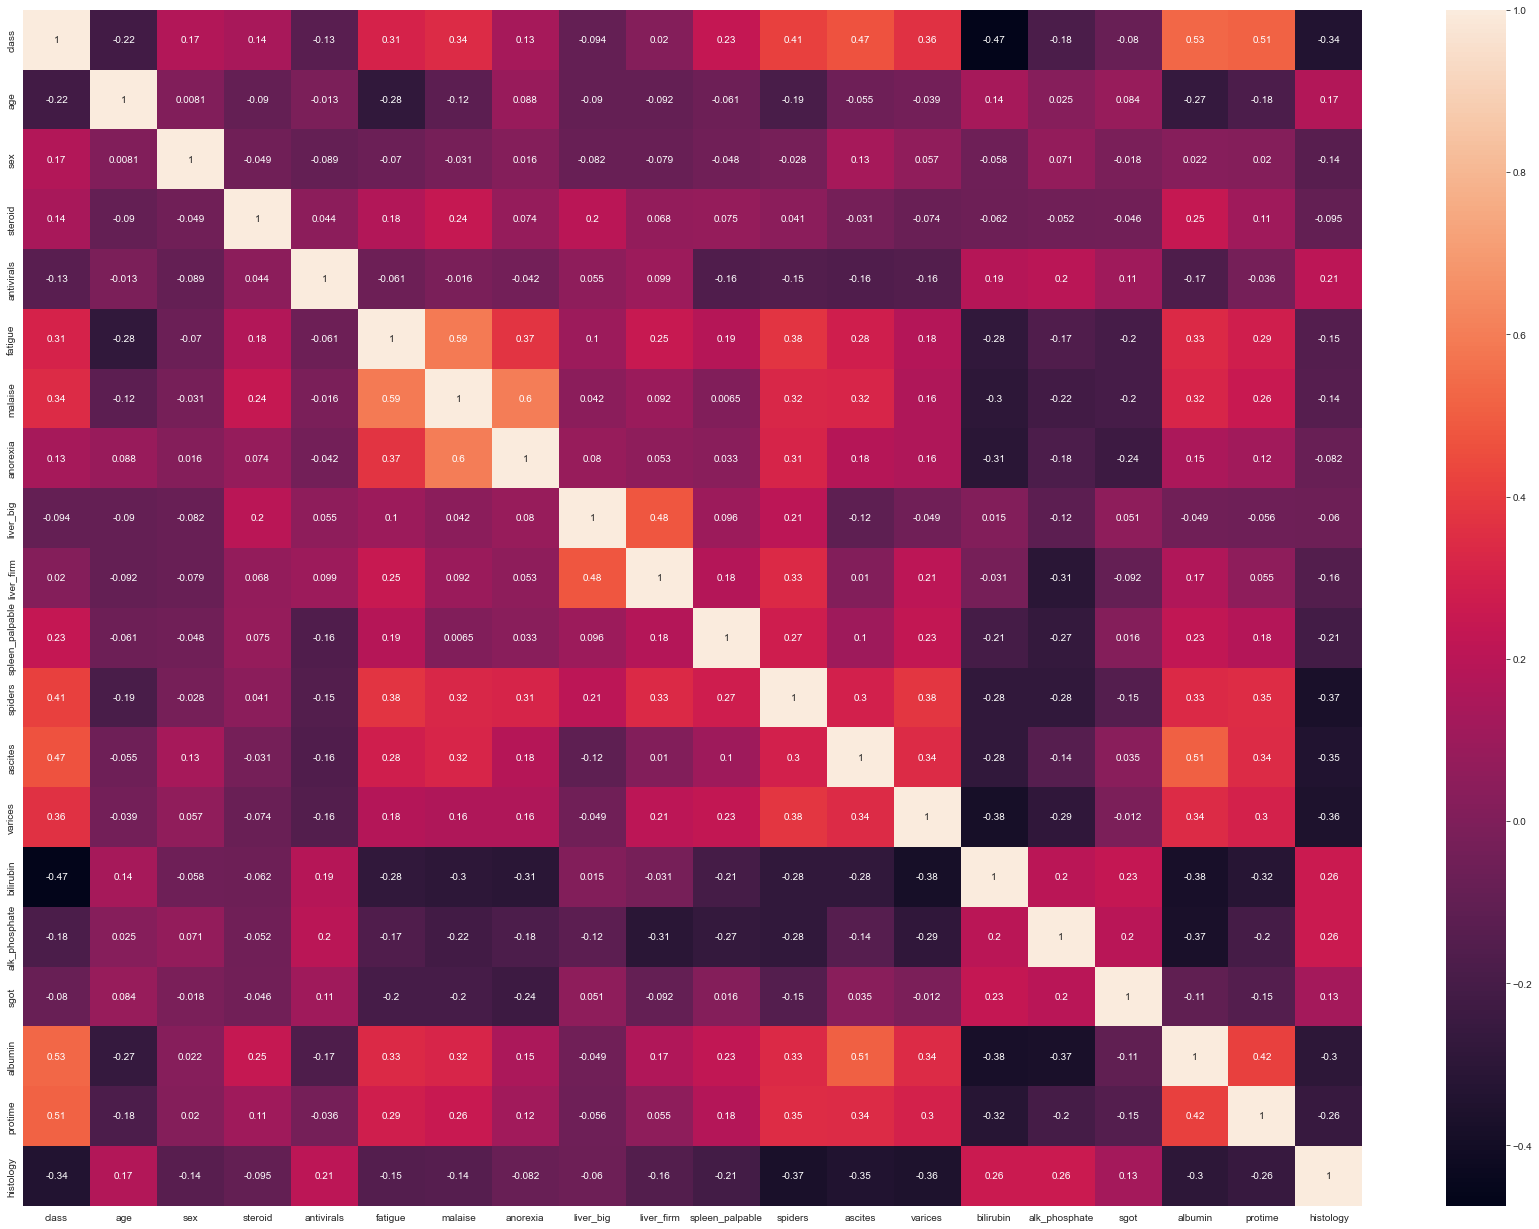

In [29]:
plt.figure(figsize = (30,22))
sns.heatmap(data_df_2.corr(), annot = True)

# Feature Engineering

## Principal Component Analysis (PCA)

### KMO and Bartlett's Test

In [30]:
# inisialisasi feature
x_std_df = std_data_df.drop(['class'], axis=1)

In [31]:
# menghitung uji KMO
kmo_all, kmo_model = calculate_kmo(x_std_df)
print("KMO Measure of Sampling Adequacy :",round(kmo_model,3))

KMO Measure of Sampling Adequacy : 0.746


In [32]:
# menghitung uji Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(x_std_df)
print("Approx. Chi-Square Value :",round(chi_square_value,3))
print("P-Value                  :",round(p_value,3))

Approx. Chi-Square Value : 706.878
P-Value                  : 0.0


### Nilai Eigen dan Vektor Eigen

In [33]:
# membuat objek pca
pca = PCA()

# fit data
pca.fit(x_std_df)

# mendapatkan nilai eigen dan vektor eigen
eigenvalues = np.round(pca.explained_variance_, 3)
eigenvectors = np.round(pca.components_, 3)

for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors)):
    print(f"Eigenvalue {i+1}: {eigenvalue}")
    print(f"Eigenvector {i+1}:")
    print(eigenvector)
    print()

Eigenvalue 1: 4.384
Eigenvector 1:
[ 0.136 -0.013 -0.101  0.122 -0.302 -0.293 -0.228 -0.061 -0.165 -0.182
 -0.325 -0.269 -0.27   0.286  0.246  0.142 -0.331 -0.271  0.257]

Eigenvalue 2: 1.815
Eigenvector 2:
[ 0.096  0.277 -0.261 -0.266 -0.19  -0.129 -0.104 -0.528 -0.447 -0.029
 -0.106  0.308  0.198 -0.161  0.081  0.049  0.121  0.136 -0.139]

Eigenvalue 3: 1.642
Eigenvector 3:
[-0.046  0.004 -0.123 -0.144 -0.261 -0.462 -0.43   0.221  0.311  0.343
  0.125 -0.025  0.228  0.081 -0.214  0.218  0.049 -0.004 -0.25 ]

Eigenvalue 4: 1.275
Eigenvector 4:
[-0.549 -0.018  0.352  0.266  0.113 -0.033 -0.378 -0.055 -0.111 -0.048
 -0.093  0.133 -0.145  0.074  0.274  0.236  0.279  0.26  -0.03 ]

Eigenvalue 5: 1.104
Eigenvector 5:
[ 0.258  0.034 -0.231  0.389  0.045  0.131  0.154  0.092  0.143 -0.1
  0.132  0.358  0.26   0.128  0.202  0.607 -0.047  0.013  0.068]

Eigenvalue 6: 1.048
Eigenvector 6:
[-0.193  0.743 -0.032 -0.001 -0.033 -0.009  0.044  0.265  0.156 -0.314
  0.088  0.022 -0.046  0.018  0.208 

### Kumulatif Total Varians

In [34]:
# initial eigenvalues
variance_ratio = np.round(pca.explained_variance_ratio_, 5)
cumulative_variance_ratio = np.round(np.cumsum(pca.explained_variance_ratio_), 5)

eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues, '% of Variance': variance_ratio*100, 'Cumulative %': cumulative_variance_ratio*100})
eigenvalues_df

,Eigenvalue,% of Variance,Cumulative %
0,4.384,23.076,23.076
1,1.815,9.551,32.627
2,1.642,8.640,41.267
3,1.275,6.709,47.976
4,1.104,5.812,53.788
5,1.048,5.514,59.301
6,1.003,5.277,64.579
7,0.884,4.654,69.232
8,0.821,4.322,73.554
9,0.737,3.878,77.432


### Scree Plot

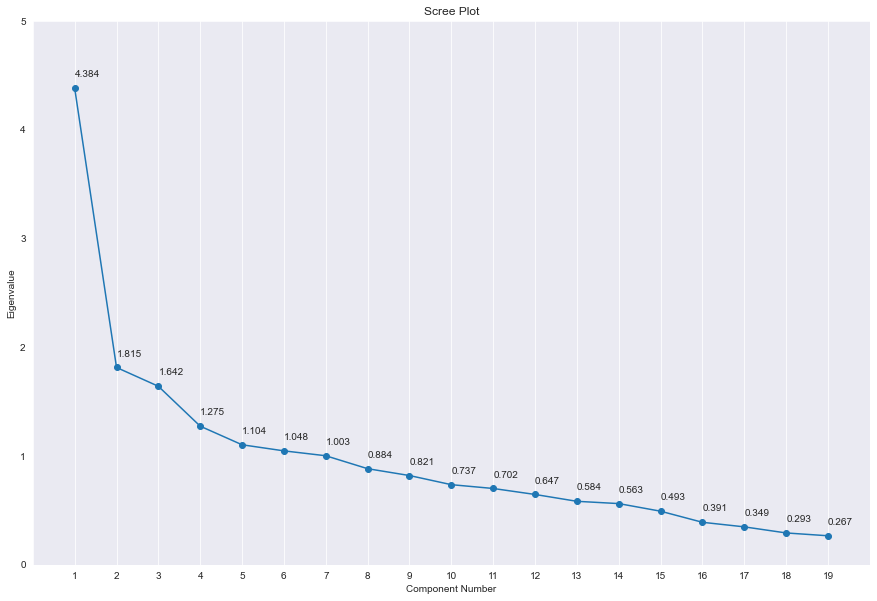

In [35]:
# mengatur ukuran plot
plt.figure(figsize=(15,10))

# membuat titik dan garis pada plot
plt.scatter(range(1,x_std_df.shape[1]+1),eigenvalues)
plt.plot(range(1,x_std_df.shape[1]+1),eigenvalues)

# menambahkan judul dan label pada plot
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')

# mengatur batas sumbu x dan y
plt.xlim(0,20)
plt.ylim(0,5)

# mengatur interval sumbu x dan y
plt.xticks(np.arange(1,20,1))

# menambahkan nilai di setiap titik pada plot hanya untuk > 1
for i, txt in enumerate(eigenvalues):
    plt.annotate(np.round(txt,3), (i+1, eigenvalues[i]+0.1))

# membuat garis vertikal pada plot
plt.grid(axis='y')

# menampilkan plot
plt.show()

### PCA

In [36]:
# mendapatkan jumlah komponen yang memiliki eigenvalue > 1
n_components = np.sum(eigenvalues > 1)

# membuat objek pca dengan n_components
pca_n = PCA(n_components=n_components)

# fit & transform data
x_pca_n = pca_n.fit_transform(x_std_df)

# mengubah menjadi dataframe
pca_df = pd.DataFrame(x_pca_n, columns=[f'PC{i}' for i in range(1,n_components+1)])
pca_df['class'] = std_data_df['class']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,class
0,-2.005940,1.594818,-0.619024,-0.075396,0.022346,2.008249,-1.219660,2
1,-0.574275,1.254984,-0.374400,-0.996163,0.634677,-0.372378,-1.197502,2
2,-1.170162,-0.432906,0.058322,-1.713813,0.700773,-0.423572,1.515999,2
3,-3.079418,-0.432691,0.355093,-0.205469,-1.313428,-0.120654,0.682817,2
4,-1.909783,-1.104172,0.082479,0.942501,1.098080,-0.103467,0.575593,2
...,...,...,...,...,...,...,...,...
150,5.224437,-2.767731,1.589112,1.469756,-0.282508,-0.636883,1.469917,1
151,-0.460341,0.086615,-0.785288,0.553179,0.728573,-0.972063,1.050465,2
152,0.989926,2.473284,-0.612725,-1.196871,-0.307120,-2.008985,-0.454009,2
153,1.535296,-0.055015,-1.829648,-0.968854,-0.027567,2.669334,0.600819,2


# Predictive Modeling

In [37]:
# membuat objek model klasifikasi

logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()

# list model
model_list = [logreg, tree,  knn]

In [38]:
# membuat predefined function untuk melakukan training dan testing
def train_test_model(model, xtrain, xtest, ytrain):
    start = time.time()
    # melakukan training model
    model.fit(xtrain, ytrain)
    end = time.time()

    # melakukan testing model
    y_pred = model.predict(xtest)

    # menghitung waktu training
    training_time = end - start

    # mengembalikan hasil testing
    return y_pred, training_time

# membuat predefined function untuk melakukan evaluasi model
def evaluate_model(ytest, ypred):
    report = classification_report(ytest, ypred, output_dict=True)

    # accuracy
    accuracy = report['accuracy']

    # recall & specificity
    recall = report['2']['recall']
    specificity = report['1']['recall']

    # precision & npv
    precision = report['2']['precision']
    npv = report['1']['precision']

    # f1-score
    f1_score = report['2']['f1-score']

    return accuracy, recall, specificity, precision, npv, f1_score

# membuat predefined function untuk melakukan training, testing, dan evaluasi model
def model_report(models, xtrain, xtest, ytrain, ytest):
    eval_list = []

    for model in models:
        # training dan testing model
        y_pred, training_time = train_test_model(model, xtrain, xtest, ytrain)
        # evaluasi model
        accuracy, recall, specificity, precision, npv, f1_score = evaluate_model(ytest, y_pred)
        # menampilkan hasil evaluasi dalam bentuk dictionary
        model_name = model.__class__.__name__
        eval_dict = {'Model': model_name, 
                    'Accuracy': accuracy,
                    'Recall': recall,
                    'Specificity': specificity,
                    'Precision': precision,
                    'NPV': npv,
                    'F1-Score': f1_score,
                    'Training Time (s)': training_time
                    }
        
        eval_list.append(eval_dict)

    # membuat dataframe dari hasil evaluasi
    eval_df = pd.DataFrame(eval_list)
    eval_df = eval_df.set_index('Model')
    eval_df.index.name = 'Metrik'
    eval_df = eval_df.T

    return eval_df

## Without Feature Engineering (PCA)

In [39]:
X = std_data_df.drop(['class'], axis=1)
y = std_data_df['class']

# membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menampilkan jumlah data training dan testing
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing : {X_test.shape[0]}")

Jumlah data training: 124
Jumlah data testing : 31


In [40]:
withouth_pca = model_report(model_list, X_train, X_test, y_train, y_test)
withouth_pca

Metrik,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier
Accuracy,0.870968,0.935484,0.838710
Recall,0.958333,0.958333,0.916667
Specificity,0.571429,0.857143,0.571429
Precision,0.884615,0.958333,0.880000
NPV,0.800000,0.857143,0.666667
F1-Score,0.920000,0.958333,0.897959
Training Time (s),0.000000,0.000000,0.008158


## With Feature Engineering (PCA)

In [41]:
X_pca = pca_df.drop(['class'], axis=1)
y_pca = pca_df['class']

# membagi data menjadi training dan testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# menampilkan jumlah data training dan testing
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing : {X_test.shape[0]}")

Jumlah data training: 124
Jumlah data testing : 31


In [42]:
with_pca = model_report(model_list, X_train_2, X_test_2, y_train_2, y_test_2)
with_pca

Metrik,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier
Accuracy,0.903226,0.741935,0.838710
Recall,0.958333,0.791667,0.916667
Specificity,0.714286,0.571429,0.571429
Precision,0.920000,0.863636,0.880000
NPV,0.833333,0.444444,0.666667
F1-Score,0.938776,0.826087,0.897959
Training Time (s),0.000000,0.008020,0.000000
